<bound method NDFrame.head of          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012      

c:\Users\jurri\anaconda3\envs\py310\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\jurri\anaconda3\envs\py310\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


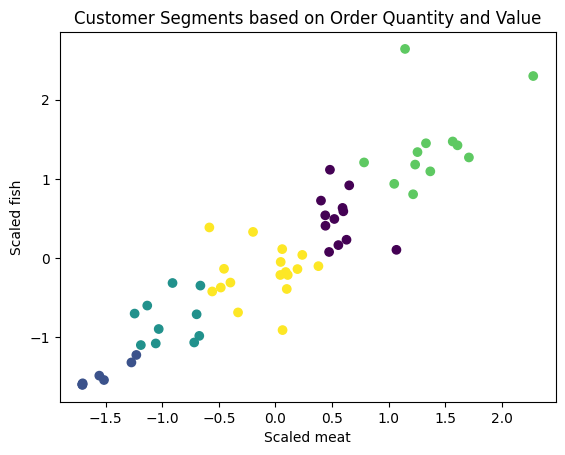

    Cluster  Year_Birth  MntFruits  MntMeatProducts  MntFishProducts
0         1        1893          0                5                7
1         1        1899        144              562              104
2         1        1900          6                8                7
3         1        1940          0                7                0
4         1        1941         42              716               55
5         2        1943        232             2134              890
6         2        1944        465             1924              447
7         2        1945        540             2413              465
8         2        1946        423             2963             1143
9         4        1947        726             6571              615
10        4        1948        909             4545             1092
11        4        1949        499             6498             1233
12        2        1950        448             2510              627
13        0        1951       1293

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import pandas as pd
from sklearn.preprocessing import StandardScaler
 
 
df = pd.read_csv("marketing_campaign.csv",sep='\t',header=(0))
 
print(df.head)
print(df.columns)
 
df_agg = df.groupby('Year_Birth').agg({
    'MntFruits': 'sum',
    'MntMeatProducts': 'sum',
    'MntFishProducts': 'sum'
}).reset_index()
 
X = df_agg[['MntMeatProducts', 'MntFishProducts']]
 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
 
kmeans = KMeans(n_clusters=5, random_state=42)  # 3 clusters, change if needed
df_agg['Cluster'] = kmeans.fit_predict(X_scaled)
 
 
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df_agg['Cluster'], cmap='viridis')
plt.xlabel('Scaled meat')
plt.ylabel('Scaled fish')
plt.title('Customer Segments based on Order Quantity and Value')
plt.show()
 
# Step 8: View the clustered data
print(df_agg[['Cluster', 'Year_Birth', 'MntFruits', 'MntMeatProducts', 'MntFishProducts']])